# What I'm trying to do. 
- In this code I am trying to make better predications for the titanic dataset that I have, in hopes that it will perform  better than my decision tree.  
# Imports
- pandas: pandas are used to load and manipulate the dataset.
- sklearn import tree: This gives the plot_tree method which is used to visualize a decision tree.
- sklearn.ensemble import RandomForestClassifier: This implements the random forest algorithm, allowing me to combine multiple decision trees together for better accuracy.
# What is going on
- Male and Female are converted to numerical values. with 0 = male and 1 = female. 
- In the dataset, there is missing values for the Age field, because of this I have it set so that where the missing values for Age are filled it with a median, to ensure that no data is missing. 
- Setting up a variable named features, this will use pclass, Sex and Age for predictions. 
- we set x as features with y being the target, which is whether they have survived or not.  
- For working the Random Forest I use RandomForestClassifier which uses N-estimators, this is the number of decision trees that are in the forest. max_depth, this manages how far down the decision trees will go, having a limit on it makes the decision tree more readable and helps to prevent overfitting. 
# Problems encountered
- For displaying the graph, as each image is different (each decision tree is a different decision tree taken from the Random Forest) there is a chance that the information being displayed could be hard to read or overlap with each other. I have tried a few different things to prevent this, such as reducing the max_depth however these problems still persist. 

C:\Users\Luka Brennan\AppData\Local\Temp\ipykernel_36120\2951890157.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


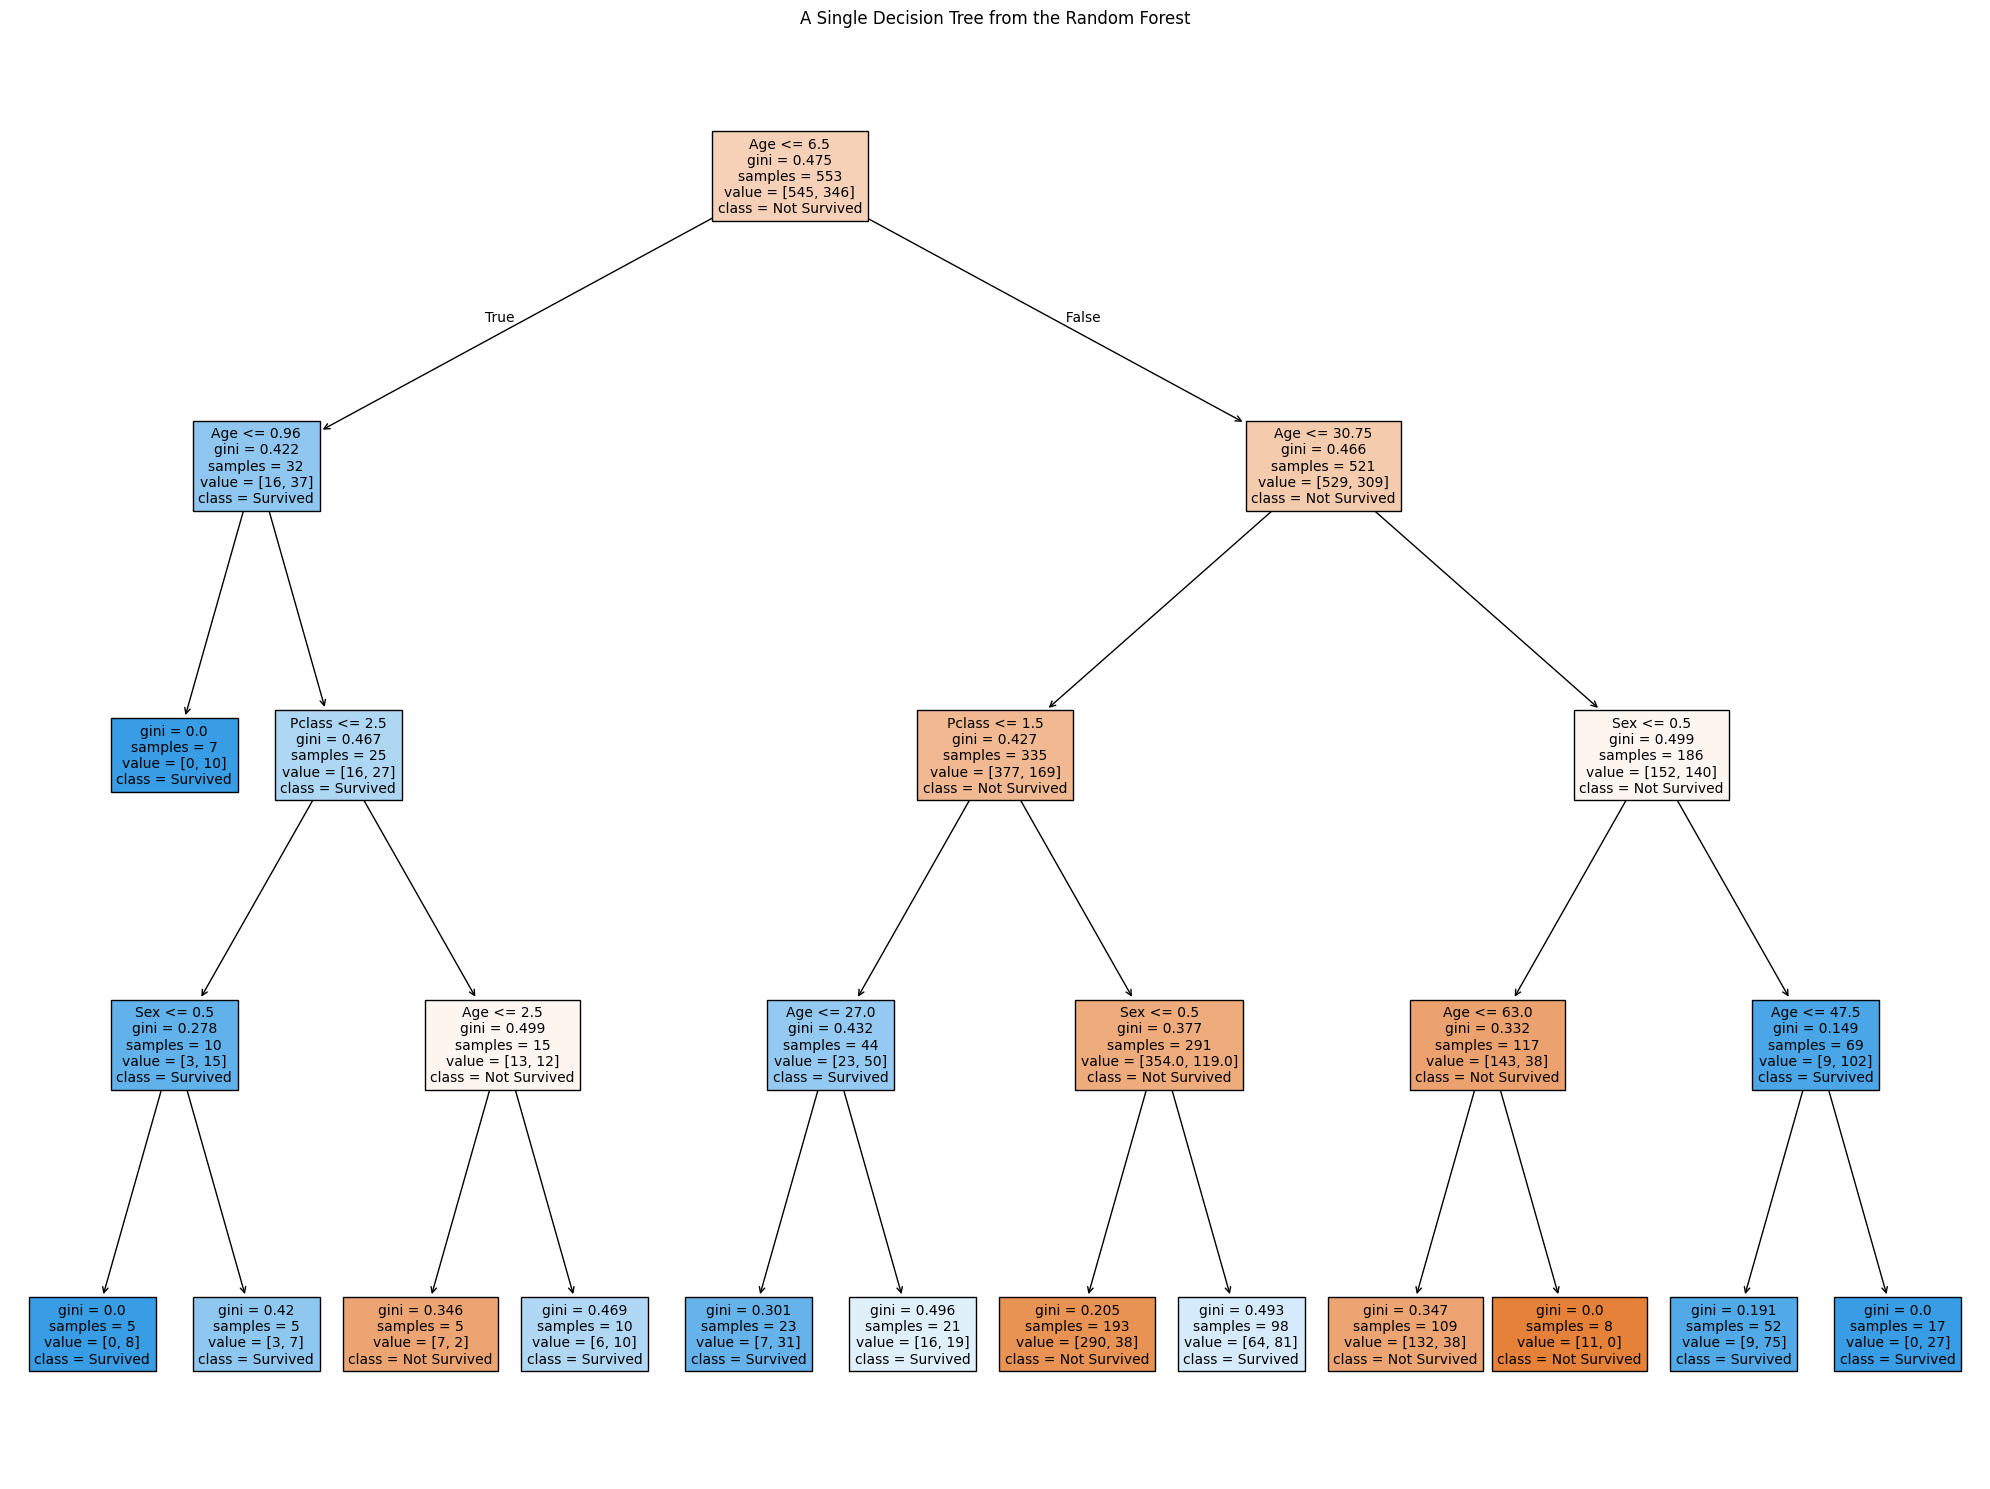

In [ ]:
import pandas as pd # type: ignore
from sklearn import tree # type: ignore
from sklearn.ensemble import RandomForestClassifier # type: ignore
import matplotlib.pyplot as plt # type: ignore

df = pd.read_csv("train.csv")

d = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(d)
df['Age'].fillna(df['Age'].median(), inplace=True)

features = ['Pclass', 'Sex', 'Age']
X = df[features]
y = df['Survived']

rforest = RandomForestClassifier(n_estimators=15, max_depth=4)
rforest.fit(X, y)

estimator = rforest.estimators_[0]
plt.figure(figsize=(20,15))
tree.plot_tree(
    estimator,
    feature_names=features,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    fontsize=10)

plt.title("A Single Decision Tree from the Random Forest")
plt.tight_layout()
plt.show()